# Animation

Needed to install a few things to get this to work.

NOTE: Restart terminal after installing an item

- xcode-select --install  (command line tools)
- Install MacPort (istalled MacPorts-2.3.5-10.12-Sierra.pkg)
- sudo port install ImageMagick (terminal)
- sudo port install ffmpeg (terminal)


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
%matplotlib inline

## FuncAnimation

```python
class matplotlib.animation.FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, interval=200, repeat_delay=None, repeat=True, blit=False, **kwargs)
```

- func
    - inputs : a value from frames and **fargs
    - use the current frame value and make a plot
    - return : A list of Artist objects, result of ax.plot() or ax.imshow(), note that result of ax.plot() is usually a list
- init_func : 
    - no inputs, cleans the axes, makes a clean slate, return the Artist object
    - default is the first frame of func
- save_count : The number of values from frames to cache
- interval : Delay between frames in milliseconds
- repeat_delay : If the animation in repeated, adds a delay in milliseconds before repeating the animation
- repeat : Controls whether the animation should repeat when the sequence of frames is completed
- blit : Controls whether blitting is used to optimize drawing


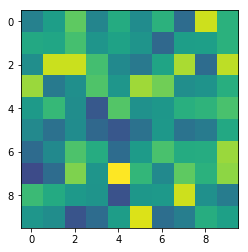

In [24]:
'''
A complete example
'''

fig, ax = plt.subplots()
image = ax.imshow(np.random.normal(size=[10,10]))

def init():
    image.set_data(image.get_array() * 0)
    return [image]
    
def draw(i):
    image.set_data(np.random.normal(size=[10,10]))
    return [image] 

ani = animation.FuncAnimation(fig, draw, np.arange(1, 20), init_func=init,
                              interval=200, blit=True)

HTML(ani.to_html5_video()) 

## ArtistAnimation

```python
class matplotlib.animation.ArtistAnimation(fig, artists, interval=200, repeat_delay=None, repeat=True, blit=False, **kwargs)
```

- artists : A list of things to draw. Each item is a list of artist objects
- interval : Delay between frames in milliseconds
- repeat_delay : If the animation in repeated, adds a delay in milliseconds before repeating the animation
- repeat : Controls whether the animation should repeat when the sequence of frames is completed
- blit : Controls whether blitting is used to optimize drawing

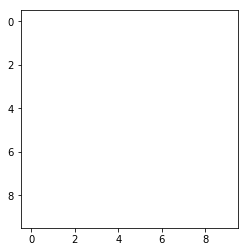

In [25]:
'''
Example : Image Animation
'''

fig, ax = plt.subplots()
images = []

for i in range(20):
    images.append([ax.imshow(np.random.normal(size=[10,10]))])

ani = animation.ArtistAnimation(fig, images, interval=500, repeat_delay=2000, repeat=True, )
HTML(ani.to_html5_video()) 

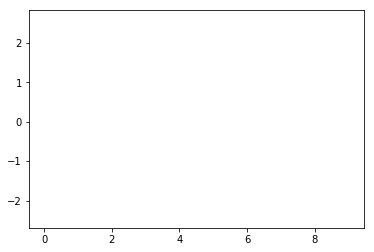

In [26]:
'''
Example : Curve Animation
'''

fig, ax = plt.subplots()
images = []

for i in range(20):
    images.append([ax.plot(np.random.normal(size=[10,]))[0]])

ani = animation.ArtistAnimation(fig, images, interval=500, repeat_delay=2000, repeat=True, )
HTML(ani.to_html5_video()) 

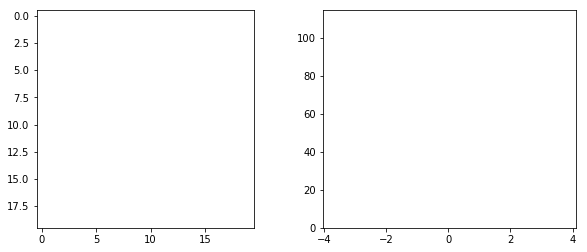

In [42]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

artists = []

for i in range(20):
    d = np.random.normal(size=[20,20])
    a1 = ax[0].imshow(d)
    a3 = ax[0].set(title=str(i))[0]
    a2 = ax[1].hist(d.flatten(), color='C{}'.format(i % 10))[2]
    artists.append([a1, *a2, a3])

ani = animation.ArtistAnimation(fig, artists, interval=200, repeat_delay=2000, repeat=True, )
HTML(ani.to_html5_video()) 